## Data cleaning

In [114]:
import pandas as pd
apps_dupes = pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\DA project\googleplaystore.csv')
apps = apps_dupes.drop_duplicates(subset = 'App')
print('Total number of apps in our dataset:', apps['App'].value_counts().sum())

Total number of apps in our dataset: 9660


In [115]:
apps = apps.drop(['Last Updated','Current Ver', 'Android Ver'], axis=1)

In [116]:
clean_chars = ['+', ',', '$','_','Varies with device','k','1  000' ]
# List of column names to clean
clean_cols = ['Installs', 'Price', 'Category', 'Size']
for col in clean_cols:
    for char in clean_chars:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, '  '))

apps.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
5675,Australia Newspapers - AU News Apps,NEWS AND MAGAZINES,4.7,48,4.1M,,Free,0,Everyone,News & Magazines
1452,"Homes.com 🏠 For Sale, Rent",HOUSE AND HOME,4.0,6000,18M,000,Free,0,Everyone,House & Home
3608,"Kids Fang - Infant Videos, Children's Songs, F...",PARENTING,4.6,349,4.4M,100 000,Free,0,Everyone,Parenting
1337,21-Day Meditation Experience,HEALTH AND FITNESS,4.4,11506,15M,100 000,Free,0,Everyone,Health & Fitness
8860,Bloons TD 5,FAMILY,4.6,190086,94M,000,Paid,2.99,Everyone,Strategy
8148,signály.cz,SOCIAL,NaN,38,881,,Free,0,Everyone,Social
9992,ew-Magazin,NEWS AND MAGAZINES,NaN,2,13M,100,Free,0,Everyone,News & Magazines
4700,Mike V: Skateboard Party PRO,SPORTS,4.2,2506,,50 000,Paid,3.99,Everyone,Sports
6405,Cerulean Heart,FAMILY,4.6,2683,25M,10 000,Free,0,Mature 17+,Simulation
1736,Roll the Ball® - slide puzzle,GAME,4.5,1385093,35M,100 000 000,Free,0,Everyone,Puzzle


## Comparison of App ratings with size and price using Joint Plots and Bar Plots

<Figure size 2000x1200 with 0 Axes>

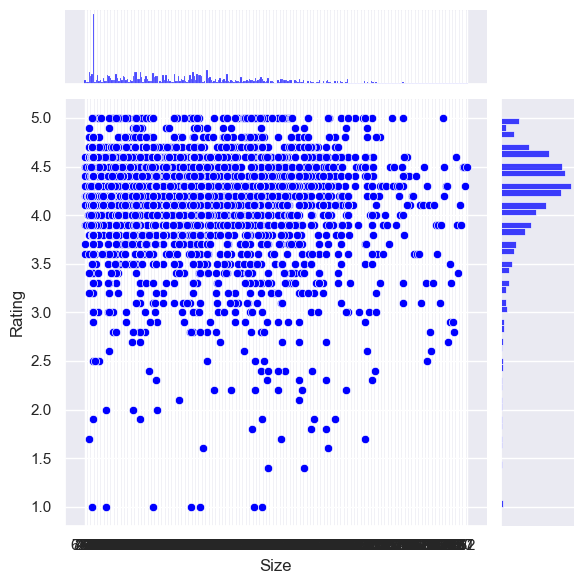

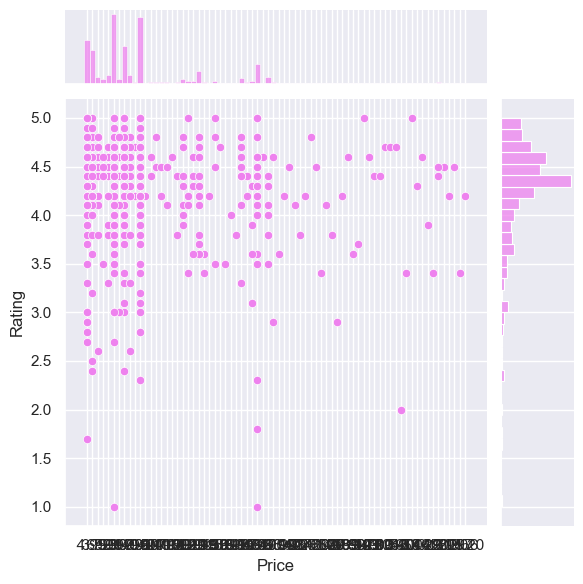

In [117]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20, 12))

# Convert 'Size' and 'Rating' columns to numeric types
apps_nonull['Size'] = pd.to_numeric(apps_nonull['Size'], errors='coerce')
apps_nonull['Rating'] = pd.to_numeric(apps_nonull['Rating'], errors='coerce')

# Check and handle missing values
apps_nonull = apps.dropna(subset=['Size', 'Rating'])

# Subset for categories with at least 250 apps
large_categories = apps_nonull.groupby('Category').filter(lambda x: len(x) >= 500)

# Plot size vs. rating
size_vs_rating = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'], data='apps', color= 'blue')

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_nonull[apps_nonull['Type'] == 'Paid']

# Plot price vs. rating for paid apps
price_vs_rating = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'],data='apps', color= 'violet')


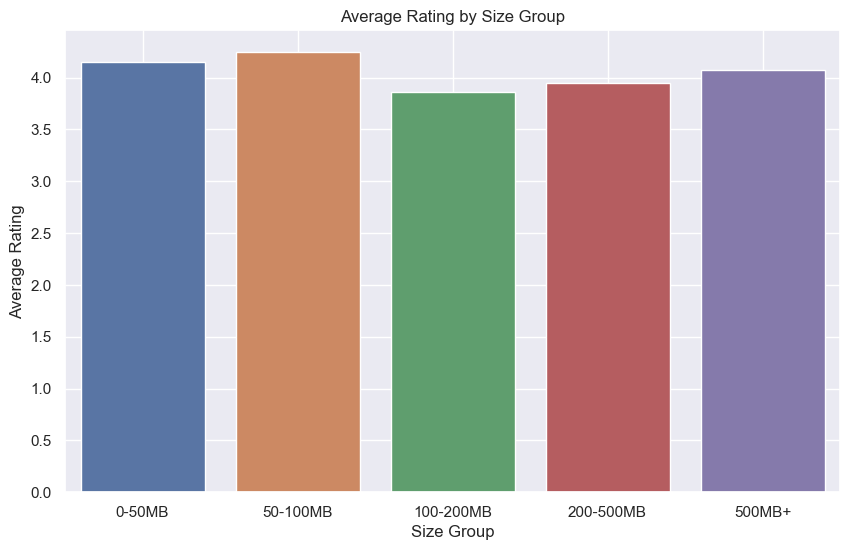

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'android_apps_data' containing the data
# Convert 'Size' column to string type
apps['Size'] = apps['Size'].astype(str)

# Clean 'Size' column by removing non-numeric characters and whitespace
apps['Size'] = apps['Size'].str.replace('[^\d.M]', '', regex=True).str.strip()

# Convert 'Size' column to numeric (remove 'M' suffix if present)
apps['Size'] = apps['Size'].str.replace('M', '').astype(float)

# Define bins for 'Size' data
bins = [0, 50, 100, 200, 500, float('inf')]  # Define your own bins as needed

# Group 'Size' data into bins
size_groups = pd.cut(apps['Size'], bins=bins, labels=['0-50MB', '50-100MB', '100-200MB', '200-500MB', '500MB+'])

# Create a new DataFrame with grouped data
grouped_data = pd.DataFrame({'Size_Group': size_groups, 'Rating': apps['Rating']})

# Calculate the average rating for each group
avg_ratings = grouped_data.groupby('Size_Group')['Rating'].mean().reset_index()

# Plot the grouped data
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_ratings, x='Size_Group', y='Rating')
plt.title('Average Rating by Size Group')
plt.xlabel('Size Group')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
